# ANN

In [41]:
print(importance_df.head(20))

                              Feature  Importance
0       Delivery Status_Late delivery    0.365732
1            Days for shipping (real)    0.240309
2    Delivery Status_Shipping on time    0.093708
3       Days for shipment (scheduled)    0.086605
4        Shipping Mode_Standard Class    0.079653
5   Delivery Status_Shipping canceled    0.023672
6          Shipping Mode_Second Class    0.016024
7        Order Status_SUSPECTED_FRAUD    0.008963
8              Shipping Mode_Same Day    0.004470
9                        shipping_day    0.003463
10                          order_day    0.003428
11                      Type_TRANSFER    0.002475
12               Order Status_PENDING    0.002180
13             Order Profit Per Order    0.001846
14                   Order Item Total    0.001795
15                Order Item Discount    0.001709
16            Order Item Profit Ratio    0.001667
17            Order Status_PROCESSING    0.001519
18           Order Item Discount Rate    0.001485


In [52]:
data_ANN = data_cleaned.copy()
data_ANN.info()
# Dropping Date variable

# Example: Assume df is your DataFrame and 'target' is your response variable
X = data_ANN.drop(columns=['Late_delivery_risk'])
y = data_ANN['Late_delivery_risk']
y = pd.to_numeric(y, errors='coerce').astype('float32')
# Identify categorical columns by data type (or define them manually)
categorical_columns = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Create a new DataFrame with categorical columns one-hot encoded (dummified)
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
display(y)

<class 'pandas.core.frame.DataFrame'>
Index: 149287 entries, 0 to 180516
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           149287 non-null  object 
 1   Days for shipping (real)       149287 non-null  int64  
 2   Days for shipment (scheduled)  149287 non-null  int64  
 3   Delivery Status                149287 non-null  object 
 4   Late_delivery_risk             149287 non-null  object 
 5   Category Name                  149287 non-null  object 
 6   Customer City                  149287 non-null  object 
 7   Customer Country               149287 non-null  object 
 8   Customer Segment               149287 non-null  object 
 9   Customer State                 149287 non-null  object 
 10  Department Name                149287 non-null  object 
 11  Market                         149287 non-null  object 
 12  Order City                     1492

0         0.0
3         0.0
4         0.0
5         0.0
6         1.0
         ... 
180507    1.0
180508    1.0
180509    0.0
180514    0.0
180516    1.0
Name: Late_delivery_risk, Length: 149287, dtype: float32

## Initial Model

No GPU devices found. Using CPU instead.
Selected features: ['Days for shipment (scheduled)', 'Shipping Mode_Standard Class', 'Order Status_SUSPECTED_FRAUD', 'Shipping Mode_Same Day', 'Type_TRANSFER', 'Order Status_PENDING', 'Order Profit Per Order', 'Order Item Total', 'Order Item Discount', 'Order Item Profit Ratio']
Model input dimension: 10
Epoch 1/5
2983/2986 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6930 - loss: 0.5585

2986/2986 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.6930 - loss: 0.5585 - val_accuracy: 0.7078 - val_loss: 0.5347
Epoch 2/5
2975/2986 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7023 - loss: 0.5391

2986/2986 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7023 - loss: 0.5391 - val_accuracy: 0.7079 - val_loss: 0.5331
Epoch 3/5
2982/2986 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7019 - loss: 0.5381

2986/2986 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7019 - loss: 0.5381 - val_accuracy: 0.7055 - val_loss: 0.5326
Epoch 4/5
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7028 - loss: 0.5360 - val_accuracy: 0.7078 - val_loss: 0.5338
Epoch 5/5
2986/2986 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7020 - loss: 0.5365 - val_accuracy: 0.7078 - val_loss: 0.5329
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 692us/step
Test Accuracy: 0.7014

Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.86      0.72     13507
         1.0       0.83      0.57      0.68     16351

    accuracy                           0.70     29858
   macro avg       0.73      0.71      0.70     29858
weighted avg       0.74      0.70      0.70     29858


Confusion Matrix:
[[11592  1915]
 [ 7002  9349]]


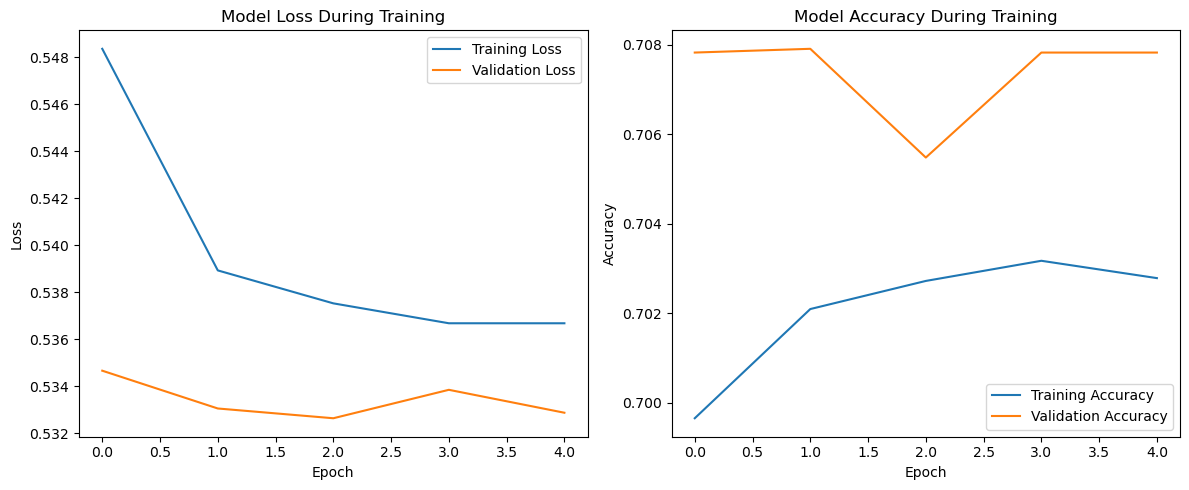

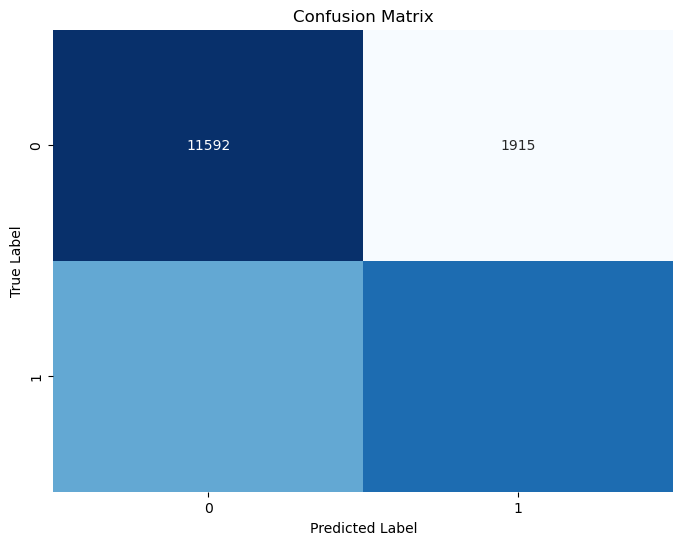

TypeError: estimator should be an estimator implementing 'fit' method, <function predict_func at 0x0000019A55A99B20> was passed

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Enable GPU acceleration - use all available GPUs
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(f"Found {len(physical_devices)} GPU(s)")
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print("GPU acceleration enabled")
else:
    print("No GPU devices found. Using CPU instead.")


# Based on feature importance, select top features excluding Delivery Status related ones
# Features to consider (based on your earlier feature importance results)
important_features = [
    'Days for shipment (scheduled)',
    'Shipping Mode_Standard Class',
    'Order Status_SUSPECTED_FRAUD', 
    'Shipping Mode_Same Day',
    'Type_TRANSFER',
    'Order Status_PENDING',
    'Order Profit Per Order',
    'Order Item Total',
    'Order Item Discount',
    'Order Item Profit Ratio',
    'Order Status_PROCESSING',
    'Order Item Discount Rate'
]

# Filter out features containing "Delivery Status" 
filtered_features = [feature for feature in important_features if "Delivery Status" not in feature]

# Find actual column names in the dataset that match or are similar to the important features
selected_features = []
for feature in filtered_features:
    # Direct match
    if feature in X.columns:
        selected_features.append(feature)
    else:
        # Try to find similar matches for encoded features
        for col in X.columns:
            # Handle various encoding patterns
            if feature.replace('_', ' ') in col or feature.replace(' ', '_') in col:
                selected_features.append(col)
                print(f"Found match for {feature}: {col}")
                break

# Limit to top 10 features
selected_features = selected_features[:10]
print(f"Selected features: {selected_features}")

# Subset data to include only selected features
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model
def build_ann_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train the model
input_dim = X_train_scaled.shape[1]
print(f"Model input dimension: {input_dim}")

model = build_ann_model(input_dim)

# Add early stopping and model checkpoint
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.h5',
    save_best_only=True,
    monitor='val_loss'
)

# Train model with callbacks
history = model.fit(
    X_train_scaled, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred.flatten() == y_test.values)
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('ann_training_history.png')
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('ann_confusion_matrix.png')
plt.show()

# Get feature importance through permutation importance
from sklearn.inspection import permutation_importance

# Function to predict with the model
def predict_func(X):
    X_scaled = scaler.transform(X)
    return model.predict(X_scaled).flatten()

# Calculate permutation importance
result = permutation_importance(
    predict_func, X_test, y_test,
    n_repeats=5,
    random_state=42
)

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Late Delivery Risk')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nFeature Importance:")
print(importance_df)

print("\nANN Model Training Complete")

## K = 10 Cross Validation

In [60]:
from sklearn.model_selection import KFold, cross_val_score
import numpy as np


kfold = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = []


for train_idx, test_idx in kfold.split(X_selected):

    X_train_cv, X_test_cv = X_selected.iloc[train_idx], X_selected.iloc[test_idx]
    y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]
    

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_cv)
    X_test_scaled = scaler.transform(X_test_cv)
    

    model = build_ann_model(X_train_scaled.shape[1])
    model.fit(
        X_train_scaled, y_train_cv,
        epochs=5,
        batch_size=32,
        verbose=0
    )
    

    y_pred_prob = model.predict(X_test_scaled)
    y_pred = (y_pred_prob > 0.5).astype(int)
    accuracy = np.mean(y_pred.flatten() == y_test_cv.values)
    cv_scores.append(accuracy)


print(f"Cross-Validation Results:")
print(f"Mean Accuracy: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation: {np.std(cv_scores):.4f}")
print(f"Individual Fold Accuracies: {cv_scores}")

467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step  
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 832us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Cross-Validation Results:
Mean Accuracy: 0.7037
Standard Deviation: 0.0031
Individual Fold Accuracies: [0.7040659119833881, 0.704266863152254, 0.7032621073079242, 0.7041998794292986, 0.7017884654029071, 0.7052716189965839, 0.7024583026324603, 0.6963424437299035, 0.7082663451232583, 0.7067926045016077]


## Fine-Tuning

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Further split for grid search
X_train_gs, X_val_gs, y_train_gs, y_val_gs = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

# Model building function
def build_ann_model(input_dim, neurons_layer1=128, neurons_layer2=64, neurons_layer3=32, 
                  dropout_rate1=0.3, dropout_rate2=0.2, learning_rate=0.001):
    model = Sequential([
        Dense(neurons_layer1, activation='relu', input_dim=input_dim),
        Dropout(dropout_rate1),
        Dense(neurons_layer2, activation='relu'),
        Dropout(dropout_rate2),
        Dense(neurons_layer3, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Reduced parameter grid (16 combinations)
selected_params = {
    'neurons_layer1': [64, 128],
    'dropout_rate1': [0.2, 0.4],
    'batch_size': [32, 64],
    'patience': [3, 5]
}

# Fixed parameters
fixed_params = {
    'neurons_layer2': 64,
    'neurons_layer3': 32,
    'dropout_rate2': 0.2,
    'learning_rate': 0.001,
    'epochs': 10
}

param_combinations = list(ParameterGrid(selected_params))
print(f"Total of {len(param_combinations)} parameter combinations to evaluate")

# Store results
results = []

# Evaluate each parameter combination
for i, params in enumerate(param_combinations):
    print(f"\nEvaluating parameter combination {i+1}/{len(param_combinations)}")
    
    # Combine with fixed parameters
    full_params = {**fixed_params, **params}
    
    # Separate model parameters and training parameters
    model_params = {
        'neurons_layer1': full_params['neurons_layer1'],
        'neurons_layer2': full_params['neurons_layer2'],
        'neurons_layer3': full_params['neurons_layer3'],
        'dropout_rate1': full_params['dropout_rate1'],
        'dropout_rate2': full_params['dropout_rate2'],
        'learning_rate': full_params['learning_rate']
    }
    
    batch_size = full_params['batch_size']
    epochs = full_params['epochs']
    patience = full_params['patience']
    
    # Build model
    model = build_ann_model(
        input_dim=X_train_gs.shape[1],
        **model_params
    )
    
    # Create callbacks
    callbacks = [
        EarlyStopping(
            monitor='val_loss',
            patience=patience,
            restore_best_weights=True
        ),
        ModelCheckpoint(
            f'model_gs_{i}.h5',
            save_best_only=True,
            monitor='val_loss'
        )
    ]
    
    # Train model
    history = model.fit(
        X_train_gs, y_train_gs,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_val_gs, y_val_gs),
        callbacks=callbacks,
        verbose=0
    )
    
    # Evaluate model
    val_loss, val_acc = model.evaluate(X_val_gs, y_val_gs, verbose=0)
    
    # Store results
    results.append({
        **full_params,
        'val_accuracy': val_acc,
        'val_loss': val_loss,
        'model_idx': i
    })
    
    print(f"  Validation accuracy: {val_acc:.4f}, Validation loss: {val_loss:.4f}")

# Convert to DataFrame for analysis
results_df = pd.DataFrame(results)

# Find best parameter combination
best_idx = results_df['val_accuracy'].idxmax()
best_params = results_df.loc[best_idx]
best_model_idx = int(best_params['model_idx'])

print("\nBest parameter combination:")
for param, value in best_params.items():
    if param not in ['val_accuracy', 'val_loss', 'model_idx']:
        print(f"  {param}: {value}")
print(f"Best validation accuracy: {best_params['val_accuracy']:.4f}")

# Train final model using best parameters
print("\nTraining final model with best parameters...")

# Separate model parameters and training parameters
final_model_params = {
    'neurons_layer1': best_params['neurons_layer1'],
    'neurons_layer2': best_params['neurons_layer2'],
    'neurons_layer3': best_params['neurons_layer3'],
    'dropout_rate1': best_params['dropout_rate1'],
    'dropout_rate2': best_params['dropout_rate2'],
    'learning_rate': best_params['learning_rate']
}

final_batch_size = int(best_params['batch_size'])
final_epochs = int(best_params['epochs'])
final_patience = int(best_params['patience'])

# Build final model
final_model = build_ann_model(
    input_dim=X_train_scaled.shape[1],
    **final_model_params
)

# Create callbacks
final_callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=final_patience,
        restore_best_weights=True
    ),
    ModelCheckpoint(
        'best_model_gs.h5',
        save_best_only=True,
        monitor='val_loss'
    )
]

# Train final model
history = final_model.fit(
    X_train_scaled, y_train,
    epochs=final_epochs,
    batch_size=final_batch_size,
    validation_split=0.2,
    callbacks=final_callbacks,
    verbose=1
)

# Evaluate final model
y_pred_prob = final_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred.flatten() == y_test.values)
print(f"\nTest accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Plot training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('grid_search_history.png')

# Visualize parameter effects
plt.figure(figsize=(15, 10))

# 1. Neurons count vs accuracy
plt.subplot(2, 2, 1)
sns.boxplot(x='neurons_layer1', y='val_accuracy', data=results_df)
plt.title('Layer 1 Neurons vs Accuracy')

# 2. Dropout rate vs accuracy
plt.subplot(2, 2, 2)
sns.boxplot(x='dropout_rate1', y='val_accuracy', data=results_df)
plt.title('Dropout Rate 1 vs Accuracy')

# 3. Batch size vs accuracy
plt.subplot(2, 2, 3)
sns.boxplot(x='batch_size', y='val_accuracy', data=results_df)
plt.title('Batch Size vs Accuracy')

# 4. Patience vs accuracy
plt.subplot(2, 2, 4)
sns.boxplot(x='patience', y='val_accuracy', data=results_df)
plt.title('Patience vs Accuracy')

plt.tight_layout()
plt.savefig('parameter_analysis.png')

# Get feature importance through permutation importance
from sklearn.inspection import permutation_importance

# Function to predict with the model
def predict_func(X):
    X_scaled = scaler.transform(X)
    return final_model.predict(X_scaled).flatten()

# Calculate permutation importance
result = permutation_importance(
    predict_func, X_test, y_test,
    n_repeats=5,
    random_state=42
)

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': X_selected.columns,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Late Delivery Risk')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')

print("\nGrid search complete, model evaluation and visualizations saved")

Total of 16 parameter combinations to evaluate

Evaluating parameter combination 1/16


  Validation accuracy: 0.7031, Validation loss: 0.5320

Evaluating parameter combination 2/16


  Validation accuracy: 0.7031, Validation loss: 0.5317

Evaluating parameter combination 3/16


  Validation accuracy: 0.7031, Validation loss: 0.5318

Evaluating parameter combination 4/16


  Validation accuracy: 0.7034, Validation loss: 0.5317

Evaluating parameter combination 5/16


  Validation accuracy: 0.7031, Validation loss: 0.5319

Evaluating parameter combination 6/16


  Validation accuracy: 0.7031, Validation loss: 0.5316

Evaluating parameter combination 7/16


  Validation accuracy: 0.7031, Validation loss: 0.5321

Evaluating parameter combination 8/16


  Validation accuracy: 0.7031, Validation loss: 0.5316

Evaluating parameter combination 9/16


  Validation accuracy: 0.7029, Validation loss: 0.5320

Evaluating parameter combination 10/16


  Validation accuracy: 0.7034, Validation loss: 0.5319

Evaluating parameter combination 11/16


  Validation accuracy: 0.7037, Validation loss: 0.5321

Evaluating parameter combination 12/16


  Validation accuracy: 0.7031, Validation loss: 0.5319

Evaluating parameter combination 13/16


  Validation accuracy: 0.7031, Validation loss: 0.5320

Evaluating parameter combination 14/16


  Validation accuracy: 0.7031, Validation loss: 0.5320

Evaluating parameter combination 15/16


  Validation accuracy: 0.7031, Validation loss: 0.5332

Evaluating parameter combination 16/16


  Validation accuracy: 0.7031, Validation loss: 0.5317

Best parameter combination:
  neurons_layer2: 64.0
  neurons_layer3: 32.0
  dropout_rate2: 0.2
  learning_rate: 0.001
  epochs: 10.0
  batch_size: 64.0
  dropout_rate1: 0.2
  neurons_layer1: 128.0
  patience: 3.0
Best validation accuracy: 0.7037

Training final model with best parameters...


ValueError: Cannot convert '(10, 128.0)' to a shape. Found invalid entry '128.0' of type '<class 'numpy.float64'>'. 

## Best Performance Model

No GPU devices found. Using CPU instead.
Selected features: ['Days for shipment (scheduled)', 'Shipping Mode_Standard Class', 'Order Status_SUSPECTED_FRAUD', 'Shipping Mode_Same Day', 'Type_TRANSFER', 'Order Status_PENDING', 'Order Profit Per Order', 'Order Item Total', 'Order Item Discount', 'Order Item Profit Ratio']
Model input dimension: 10
Epoch 1/10
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6948 - loss: 0.5611 - val_accuracy: 0.7078 - val_loss: 0.5334
Epoch 2/10
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7029 - loss: 0.5377 - val_accuracy: 0.7078 - val_loss: 0.5324
Epoch 3/10
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7016 - loss: 0.5370 - val_accuracy: 0.7029 - val_loss: 0.5330
Epoch 4/10
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7038 - loss: 0.5356 - val_accuracy: 0.7078 - val_loss: 0.5326
Epoch 5/10
1493/1493 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7044 - loss: 0.5360 - val_accuracy: 0.7078 - val_loss: 0.5340
934

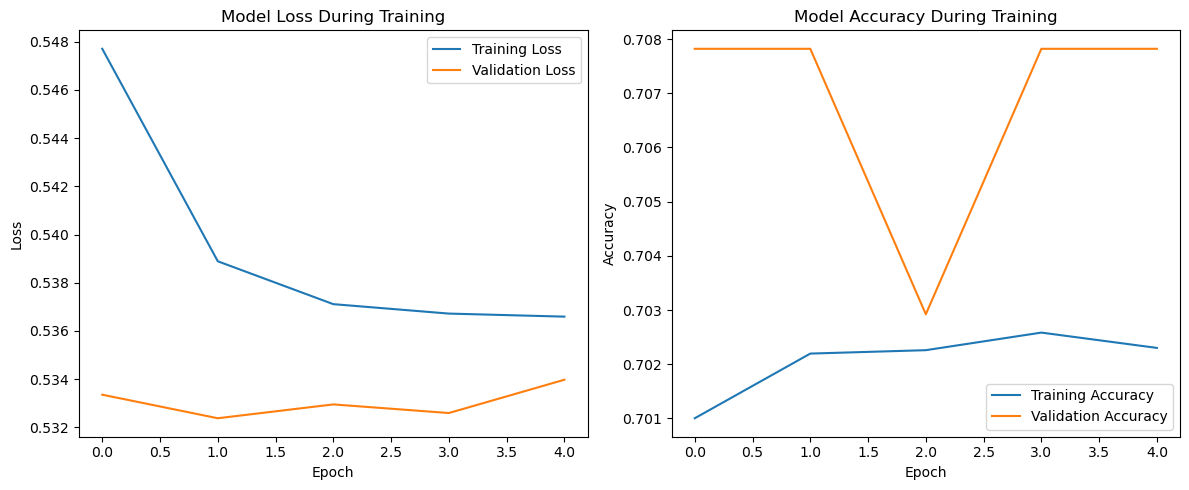

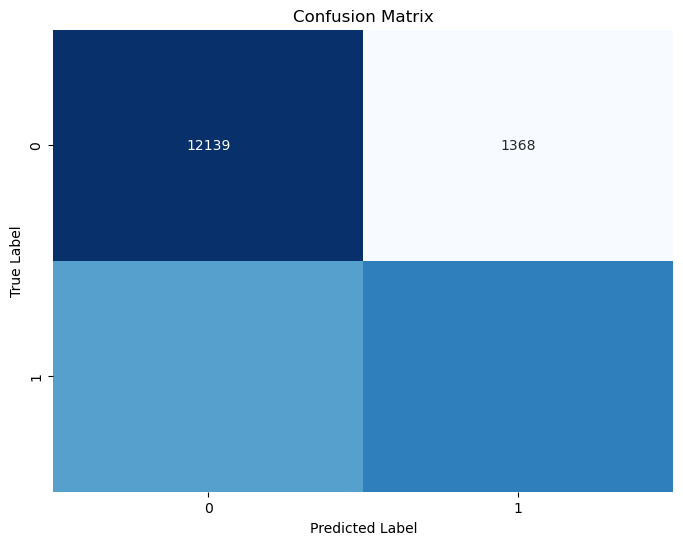

934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 934us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 761us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 790us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 816us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 653us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 735us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 882us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 696us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 669us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 648us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 716us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 708us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 741us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 784us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 699us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 868us/step
934/934 ━━━━━━━━━━━━━━━━━━━━ 1s 752us/step
934/934 ━━━

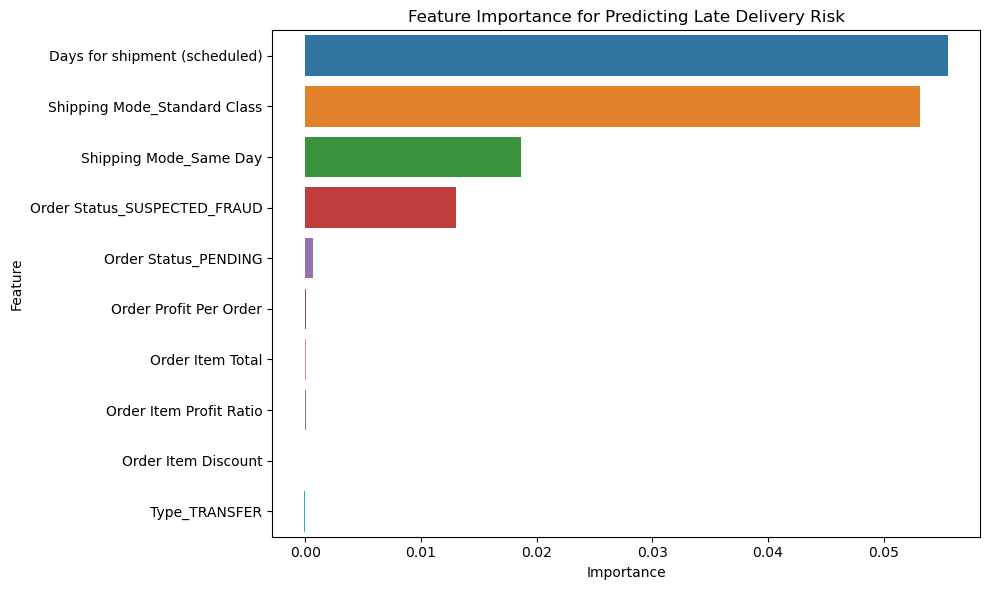


Feature Importance:
                         Feature  Importance
0  Days for shipment (scheduled)    0.055543
1   Shipping Mode_Standard Class    0.053178
3         Shipping Mode_Same Day    0.018621
2   Order Status_SUSPECTED_FRAUD    0.013008
5           Order Status_PENDING    0.000690
6         Order Profit Per Order    0.000080
7               Order Item Total    0.000060
9        Order Item Profit Ratio    0.000054
8            Order Item Discount   -0.000033
4                  Type_TRANSFER   -0.000094

ANN Model Training Complete


In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Enable GPU acceleration - use all available GPUs
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    print(f"Found {len(physical_devices)} GPU(s)")
    for device in physical_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print("GPU acceleration enabled")
else:
    print("No GPU devices found. Using CPU instead.")


# Based on feature importance, select top features excluding Delivery Status related ones
# Features to consider (based on your earlier feature importance results)
important_features = [
    'Days for shipment (scheduled)',
    'Shipping Mode_Standard Class',
    'Order Status_SUSPECTED_FRAUD', 
    'Shipping Mode_Same Day',
    'Type_TRANSFER',
    'Order Status_PENDING',
    'Order Profit Per Order',
    'Order Item Total',
    'Order Item Discount',
    'Order Item Profit Ratio',
    'Order Status_PROCESSING',
    'Order Item Discount Rate'
]

# Filter out features containing "Delivery Status" 
filtered_features = [feature for feature in important_features if "Delivery Status" not in feature]

# Find actual column names in the dataset that match or are similar to the important features
selected_features = []
for feature in filtered_features:
    # Direct match
    if feature in X.columns:
        selected_features.append(feature)
    else:
        # Try to find similar matches for encoded features
        for col in X.columns:
            # Handle various encoding patterns
            if feature.replace('_', ' ') in col or feature.replace(' ', '_') in col:
                selected_features.append(col)
                print(f"Found match for {feature}: {col}")
                break

# Limit to top 10 features
selected_features = selected_features[:10]
print(f"Selected features: {selected_features}")

# Subset data to include only selected features
X_selected = X[selected_features]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build ANN model with the optimized hyperparameters
def build_ann_model(input_dim):
    model = Sequential([
        Dense(128, activation='relu', input_dim=input_dim),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Train the model
input_dim = X_train_scaled.shape[1]
print(f"Model input dimension: {input_dim}")

model = build_ann_model(input_dim)

# Add early stopping with optimized patience
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

model_checkpoint = ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss'
)

# Train model with the optimized epochs and batch size
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate the model
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(y_pred.flatten() == y_test.values)
print(f"Test Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualize training history
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig('ann_training_history.png')
plt.show()

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('ann_confusion_matrix.png')
plt.show()

# Create a class wrapper for permutation importance
from sklearn.base import BaseEstimator, ClassifierMixin

class ModelWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, scaler):
        self.model = model
        self.scaler = scaler
        
    def fit(self, X, y):
        # Model is already trained, do nothing
        return self
        
    def predict(self, X):
        X_scaled = self.scaler.transform(X)
        return self.model.predict(X_scaled).flatten() > 0.5
    
    def predict_proba(self, X):
        X_scaled = self.scaler.transform(X)
        y_pred = self.model.predict(X_scaled).flatten()
        return np.vstack((1-y_pred, y_pred)).T

# Create the wrapper model
wrapper_model = ModelWrapper(model, scaler)

# Get feature importance through permutation importance
from sklearn.inspection import permutation_importance

# Calculate permutation importance using the wrapper
result = permutation_importance(
    wrapper_model, X_test, y_test,
    n_repeats=5,
    random_state=42
)

# Create a DataFrame with feature importances
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': result.importances_mean
})
importance_df = importance_df.sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance for Predicting Late Delivery Risk')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
plt.show()

print("\nFeature Importance:")
print(importance_df)

print("\nANN Model Training Complete")